In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.dates as md
import datetime as dt
import seaborn as sns

In [2]:
views = pd.read_csv('foodrecipepageviews.csv')
sub = pd.read_csv('subscriptioninformation.csv')

In [3]:
#convert the timestamp into pd.datatime format, which is easier to index in further analysis
views['click_time'] = pd.to_datetime(views['timestamp'])

In [4]:
#add two columns in the original views dataset
views['day'] = views['click_time'].dt.day
views['hour'] = views['click_time'].dt.hour

In [5]:
#extract topic information for each row
topic = []
for i in range(len(views)):
    tp = views.page_path[i].split('/')[1]
    topic.append(tp)
views['topic'] = topic

In [6]:
views.head()

,user_id,timestamp,page_path,page_title,campaign,page_referrer,article_publication_date,article_format,click_time,day,hour,topic
0,3564772,7/1/19 0:00,/recipes/Watermelon-Feta-Skewers,Watermelon-Feta Skewers - PureWow,NaN,https://www.purewow.com,8/5/15,Recipe,2019-07-01 00:00:00,1,0,recipes
1,1986437,7/1/19 0:00,/food/how-to-make-ginger-juice,How to Make Ginger Juice - PureWow,NaN,https://www.purewow.com,6/25/19,Article,2019-07-01 00:00:00,1,0,food
2,1993018,7/1/19 0:00,/food/new-restaurants-san-francisco-2019,10 San Francisco Restaurants Everyone Will Be ...,email,NaN,3/21/19,List,2019-07-01 00:00:00,1,0,food
3,4390499,7/1/19 0:01,/recipes/no-churn-mint-chocolate-chip-ice-cream,No-Churn Mint Chocolate Chip Ice Cream Recipe ...,email,https://www.purewow.com,6/20/19,Recipe,2019-07-01 00:01:00,1,0,recipes
4,3974225,7/1/19 0:01,/food/4th-of-july-appetizers,25 Fourth of July Appetizers Guaranteed to Imp...,email,NaN,6/11/19,List,2019-07-01 00:01:00,1,0,food


### 1. Content

In [7]:
topic_dist = views.topic.value_counts().reset_index()
topic_dist.columns = ['topic','views']
print ('The Distribution of Views in Different Topics')
topic_dist

The Distribution of Views in Different Topics


,topic,views
0,food,67222
1,recipes,55768
2,wellness,101
3,travel,30
4,sweepstakes,10
5,beauty,1


In [8]:
format_dist = views.article_format.value_counts().reset_index()
format_dist.columns = ['format','views']
print ('The Distribution of Views in Different Formats')
format_dist

The Distribution of Views in Different Formats


,format,views
0,List,61783
1,Recipe,53269
2,Article,7683
3,Video,215
4,Content Hub,170
5,Guides,12


In [9]:
#groupby the views dataset to print out the top 25 most popular articles and their detailed info
article_clicks = views.groupby(['page_title','article_format','article_publication_date','topic']).user_id.count().sort_values(ascending=False)[:25].to_frame()
article_clicks.columns = ['click_times']
article_clicks = article_clicks.reset_index()
article_clicks

,page_title,article_format,article_publication_date,topic,click_times
0,40 Low-Carb Lunch Ideas Your Stomach & Waistli...,List,6/20/19,food,10424
1,3-Ingredient Strawberry Magic Shell Ice Cream ...,Recipe,6/26/19,recipes,7768
2,Cherry Tomato Galette Recipe - PureWow,Recipe,6/25/19,recipes,5458
3,What to Cook Every Night This Week (July 1���7...,List,6/27/19,food,5259
4,31 Easy No-Cook Dinners to Make in July - PureWow,List,6/27/19,food,4952
5,How to Make Ginger Juice - PureWow,Article,6/25/19,food,2694
6,What to Buy at Aldi: July 2019 - PureWow,List,7/1/19,food,2629
7,The Best Amazon Groceries for Delivery - PureWow,List,6/26/19,food,2429
8,25 Fourth of July Appetizers Guaranteed to Imp...,List,6/11/19,food,2429
9,The 34 Best Rooftop Bars NYC Has to Offer - Pu...,List,7/3/19,food,2379


Text(0.5,1,'Most Popular Topics of Articles')

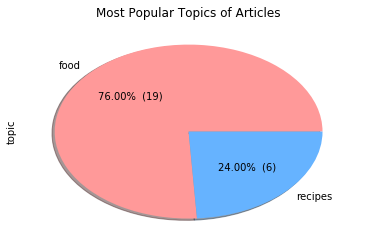

In [10]:
#write a function to dispaly the percentage as well as its original value
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
pies = article_clicks.groupby('topic').topic.count()
pies.plot(kind = 'pie', autopct=make_autopct(pies.values), shadow = True, colors = ['#ff9999','#66b3ff'])
plt.title('Most Popular Topics of Articles')

Text(0.5,1,'Most Popular Topics of Articles in View Counts')

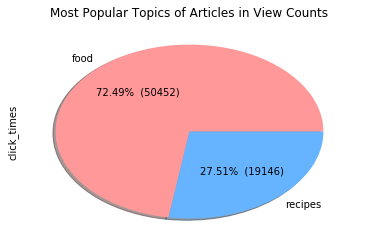

In [11]:
pies = article_clicks.groupby('topic').click_times.sum()
pies.plot(kind = 'pie', autopct=make_autopct(pies.values), shadow = True,colors = ['#ff9999','#66b3ff'])
plt.title('Most Popular Topics of Articles in View Counts')

Text(0.5,1,'Most Popular Formats of Articles')

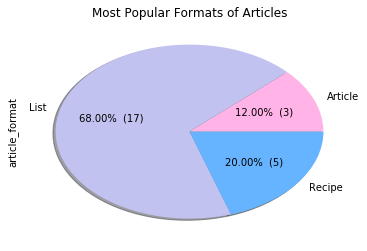

In [12]:
pies = article_clicks.groupby('article_format').article_format.count()
pies.plot(kind = 'pie', autopct=make_autopct(pies.values), shadow = True, colors = ['#ffb3e6','#c2c2f0','#66b3ff'])
plt.title('Most Popular Formats of Articles')

Text(0.5,1,'Most Popular Formats of Article in View Counts')

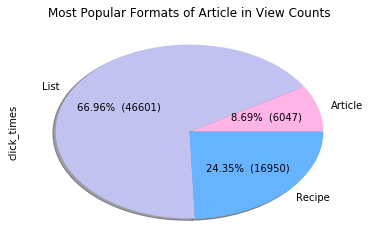

In [13]:
pies = article_clicks.groupby('article_format').click_times.sum()
pies.plot(kind = 'pie', autopct=make_autopct(pies.values), shadow = True, colors = ['#ffb3e6', '#c2c2f0','#66b3ff'])
plt.title('Most Popular Formats of Article in View Counts')

In [14]:
#view the most popular articles in recipe and check the publication date
recipe_click = views[views.topic == 'recipes'].groupby(['page_title','article_publication_date']).day.count().sort_values(ascending=False)[:25].to_frame()
recipe_click.columns = ['click times']
recipe_click

,,click times
page_title,article_publication_date,
3-Ingredient Strawberry Magic Shell Ice Cream Recipe - PureWow,6/26/19,7768
Cherry Tomato Galette Recipe - PureWow,6/25/19,5458
8 Easy Single-Serve Recipes for Feasting Solo - PureWow,6/17/19,2196
Cacio e Pepe Cauliflower Recipe - PureWow,1/19/18,1610
Spicy Corn Carbonara Recipe - PureWow,8/22/17,1179
30-Minute Angel Food Cupcakes Recipe - PureWow,6/24/19,935
No-Bake Berry Tiramisu Recipe - PureWow,5/11/17,772
15-Minute Gazpacho Recipe - PureWow,7/27/17,746
Baking Sheet Quesadilla Recipe - PureWow,5/23/16,677


#### Among the recipe articles with the highest click-throughs, there are many old posts from past few years. 

In [15]:
#count the views in food and recipes respectively for each customers
food_view = views[views.topic == 'food'].groupby(['user_id']).click_time.count().reset_index()
recipe_view = views[views.topic == 'recipes'].groupby(['user_id']).click_time.count().reset_index()
recipe_view.columns = ['user_id','recipe_section_pageviews']
food_view.columns = ['user_id','food_section_pageviews']

In [16]:
#map them with subscription dataset on user_id
topic_view = pd.merge(food_view, recipe_view, on='user_id', how='outer')
topic_view = topic_view.fillna(0).astype(int)
new_sub = pd.merge(sub, topic_view, on='user_id', how='outer')
new_sub.food_section_pageviews = new_sub.food_section_pageviews.fillna(0).astype(int)
new_sub.recipe_section_pageviews = new_sub.recipe_section_pageviews.fillna(0).astype(int)

In [17]:
favorite = []
for i in range(len(new_sub)):
    tmp = new_sub.loc[i][4:10]#.tolist()
    tmp = tmp[(tmp == tmp.max())&(tmp!=0)]
    favorite.append([i.split('_')[0] for i in tmp.keys().tolist()])
new_sub['favorite_topic'] = favorite

In [18]:
# creat favorite columns for each user based on their views in different topics
# fav topics are up to 3
fav1 = []
fav2 = []
fav3 = []
for i in range(new_sub.shape[0]):
    if len(new_sub.favorite_topic[i]) == 0:
        fav1.append('')
        fav2.append('')
        fav3.append('')
    elif len(new_sub.favorite_topic[i]) == 1:
        fav1.append(new_sub.favorite_topic[i][0])
        fav2.append('')
        fav3.append('')
    elif len(new_sub.favorite_topic[i]) == 2:
        fav1.append(new_sub.favorite_topic[i][0])
        fav2.append(new_sub.favorite_topic[i][1])
        fav3.append('')
    elif len(new_sub.favorite_topic[i]) == 3:
        fav1.append(new_sub.favorite_topic[i][0])
        fav2.append(new_sub.favorite_topic[i][1])
        fav3.append(new_sub.favorite_topic[i][2])
    else:
        fav1.append(new_sub.favorite_topic[i][0])
        fav2.append(new_sub.favorite_topic[i][1])
        fav3.append(new_sub.favorite_topic[i][2])
new_sub['fav1'] = fav1
new_sub['fav2'] = fav2
new_sub['fav3'] = fav3

In [19]:
# group the dataset by fav topics in order to view the distribution
fav1 = new_sub.groupby('fav1').user_id.count().reset_index()
fav1.columns = ['fav', 'counts']
fav2 = new_sub.groupby('fav2').user_id.count().reset_index()
fav2.columns = ['fav', 'counts']
fav3 = new_sub.groupby('fav3').user_id.count().reset_index()
fav3.columns = ['fav', 'counts']
favv = pd.merge(fav1, fav2, on='fav', how='outer')
favv = pd.merge(favv, fav3, on='fav', how='outer').fillna(0)

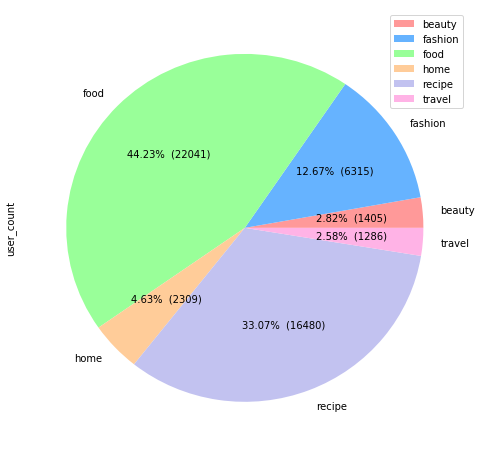

In [20]:
# plot the users distribution based on favorite topic of Articles
favv['user_count'] = favv.counts_x+favv.counts_y+favv.counts
favv = favv.drop(0, axis = 0)
favv.index = ['beauty','fashion','food','home', 'recipe', 'travel']
favv.plot(kind = 'pie', y = 'user_count',figsize=(8,8),autopct=make_autopct(favv.user_count), colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6'])

### 2. Campaign

In [21]:
# views distribution in different campaign channels
views.campaign = views.campaign.fillna('unknown')
channels = views.groupby('campaign').user_id.count().sort_values(ascending=False).reset_index()
channels.columns = ['Campaign','Views']
channels

,Campaign,Views
0,email,79169
1,unknown,41774
2,social,899
3,syndication,803
4,cpc,419
5,sms,38
6,HUFFPOBRUNCH,11
7,sweeps,9
8,display,3
9,curatorcrowd,3


In [22]:
# different referrer sources in campaign 'unknown'
views[views.campaign == 'unknown'].groupby('page_referrer').user_id.count().sort_values(ascending=False)[:10]

page_referrer
https://www.purewow.com       34437
https://www.google.com          763
https://www.msn.com             549
https://www.yahoo.com           474
https://www.pinterest.com       291
https://admin.purewow.com        61
http://www.msn.com               43
http://www.pinterest.com         31
https://r.search.yahoo.com       30
https://www.bing.com             27
Name: user_id, dtype: int64

In [23]:
# different referrer sources in email campaign
views[views.campaign == 'email'].groupby('page_referrer').user_id.count().sort_values(ascending=False)[:10]

page_referrer
https://www.purewow.com        11418
https://mail.google.com         1644
https://mail.yahoo.com           519
https://connect.xfinity.com      421
https://outlook.live.com         178
https://www.google.com            60
https://mail.aol.com              41
https://deref-mail.com            21
https://www.pinterest.com         19
https://webmaila.juno.com         16
Name: user_id, dtype: int64

In [24]:
# different referrer sources in social campaign
views[views.campaign == 'social'].groupby('page_referrer').user_id.count().sort_values(ascending=False)[:10]

page_referrer
https://www.facebook.com        172
https://www.pinterest.com       141
https://m.facebook.com          124
https://www.purewow.com         120
https://l.facebook.com           17
http://m.facebook.com            13
android-app://m.facebook.com      7
https://l.instagram.com           6
http://l.facebook.com             6
http://instagram.com              6
Name: user_id, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

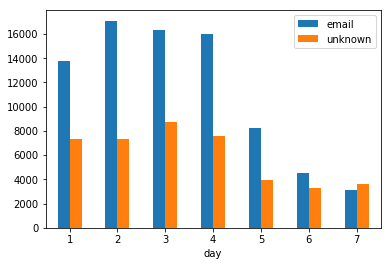

In [25]:
# views distribution of different campaigns grouped by day
unknown_campaign = views[views.campaign == 'unknown'].groupby('day').user_id.count()
email_campaign = views[views.campaign == 'email'].groupby('day').user_id.count()
cp = pd.concat([email_campaign,unknown_campaign], axis=1)
cp.columns = ['email', 'unknown']
cp.plot(kind = 'bar')
plt.xticks(rotation='horizontal')

In [26]:
# Email views in different topics
e_topic = views[views.campaign == 'email'].groupby('topic').user_id.count().sort_values(ascending = False).reset_index()
e_topic.columns = ['topic','views']
e_topic

,topic,views
0,food,55063
1,recipes,24019
2,wellness,87


In [27]:
# views from unknown campaigns in different topics
un_topic = views[views.campaign == 'unknown'].groupby('topic').user_id.count().sort_values(ascending = False).reset_index()
un_topic.columns = ['topic','views']
un_topic

,topic,views
0,recipes,31390
1,food,10339
2,travel,30
3,wellness,13
4,sweepstakes,1
5,beauty,1


### Click time and frequency

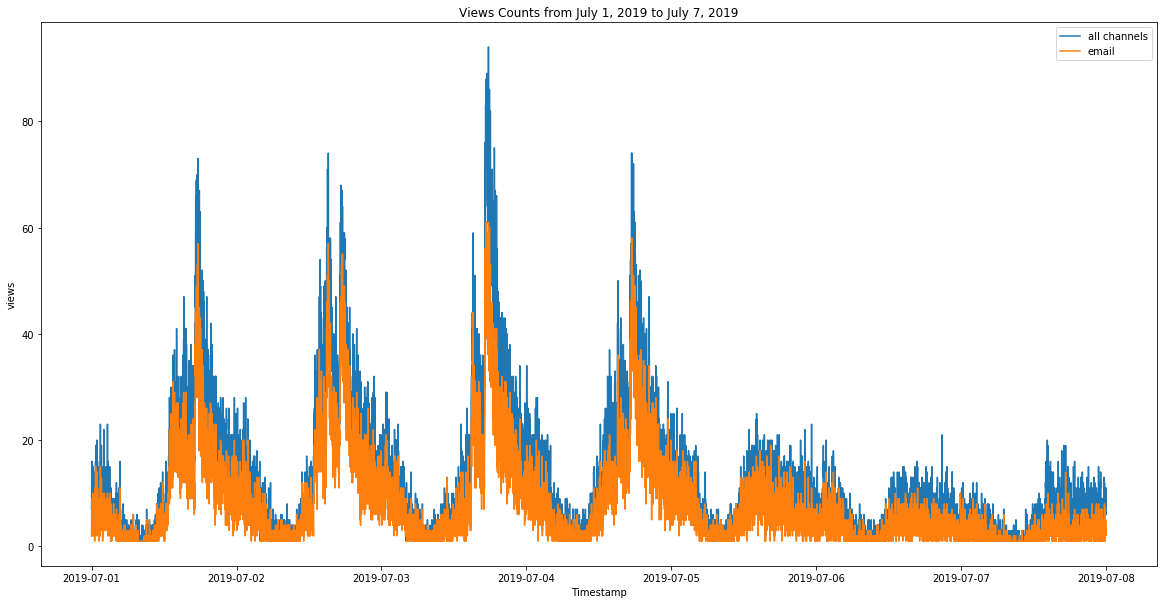

In [28]:
# group the data by time
# project the data into a time series plot
click = views.groupby('click_time').user_id.count()
email_click = views[views.campaign == 'email'].groupby('click_time').user_id.count()
plt.figure(figsize=(20,10))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.plot(click.index,click.values, label = 'all channels')
plt.plot(email_click.index,email_click.values, label = 'email')
plt.title('Views Counts from July 1, 2019 to July 7, 2019')
plt.legend()
plt.show()

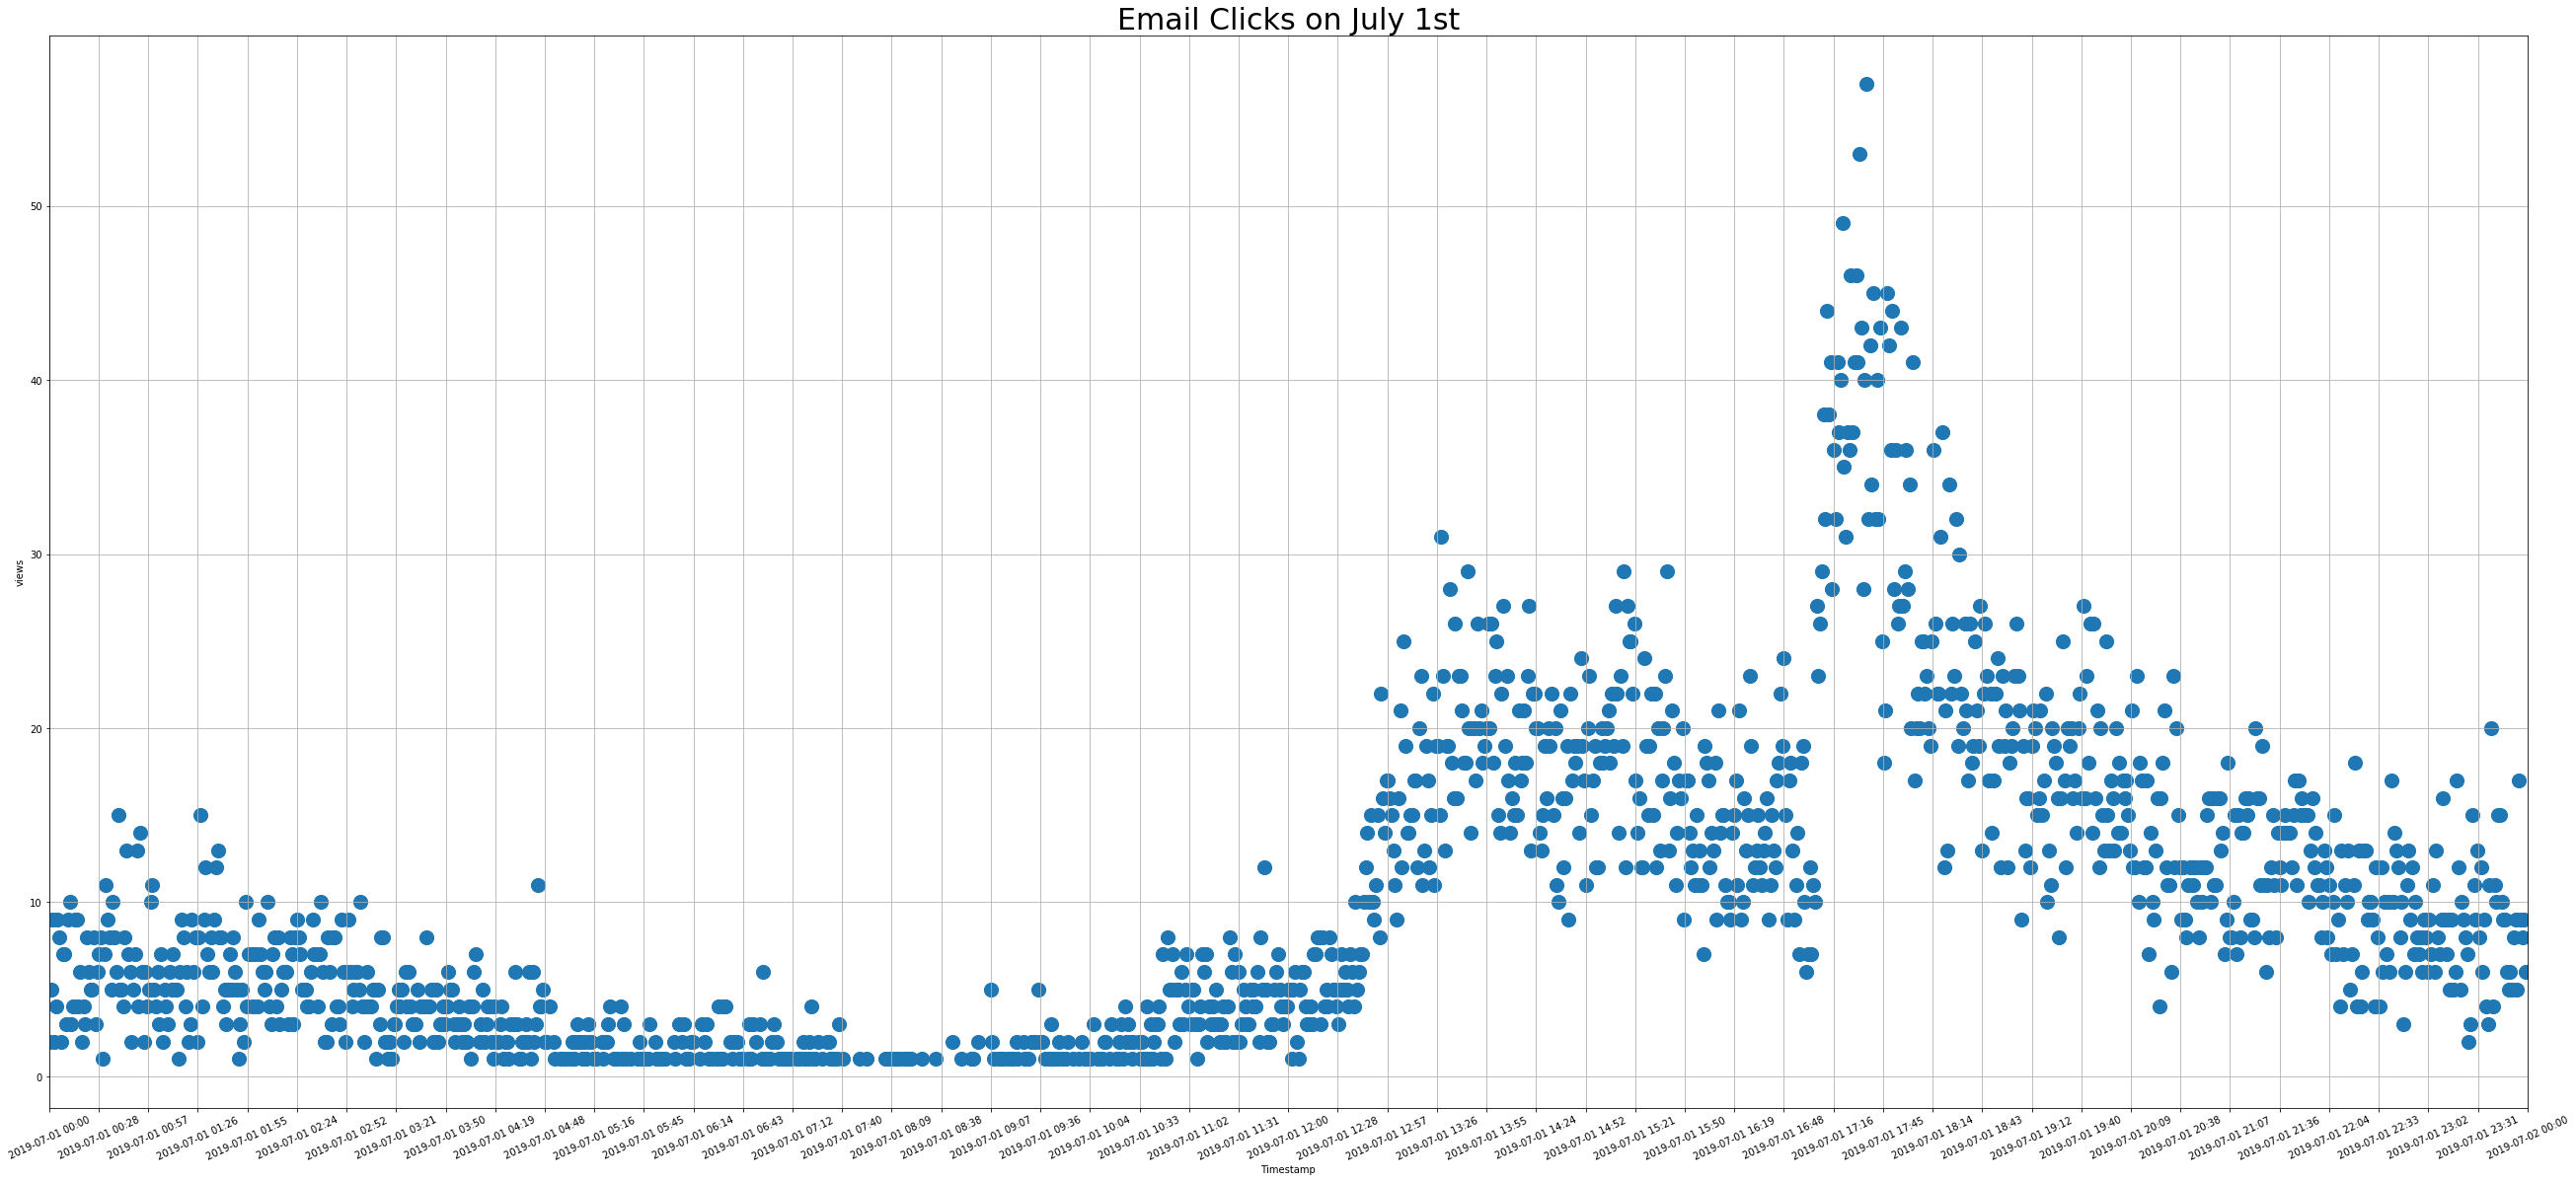

In [29]:
# further observations in each day with scatter plots
email_views = views[views.campaign == 'email']
day1 = email_views[email_views.day == 1].groupby('click_time').user_id.count()
plt.figure(figsize=(45,20))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=.02))
ax.grid()
plt.title('Email Clicks on July 1st',fontsize=30)
plt.scatter(day1.index,day1.values, s=200)
plt.xlim('2019-07-01','2019-07-02' )
plt.show()

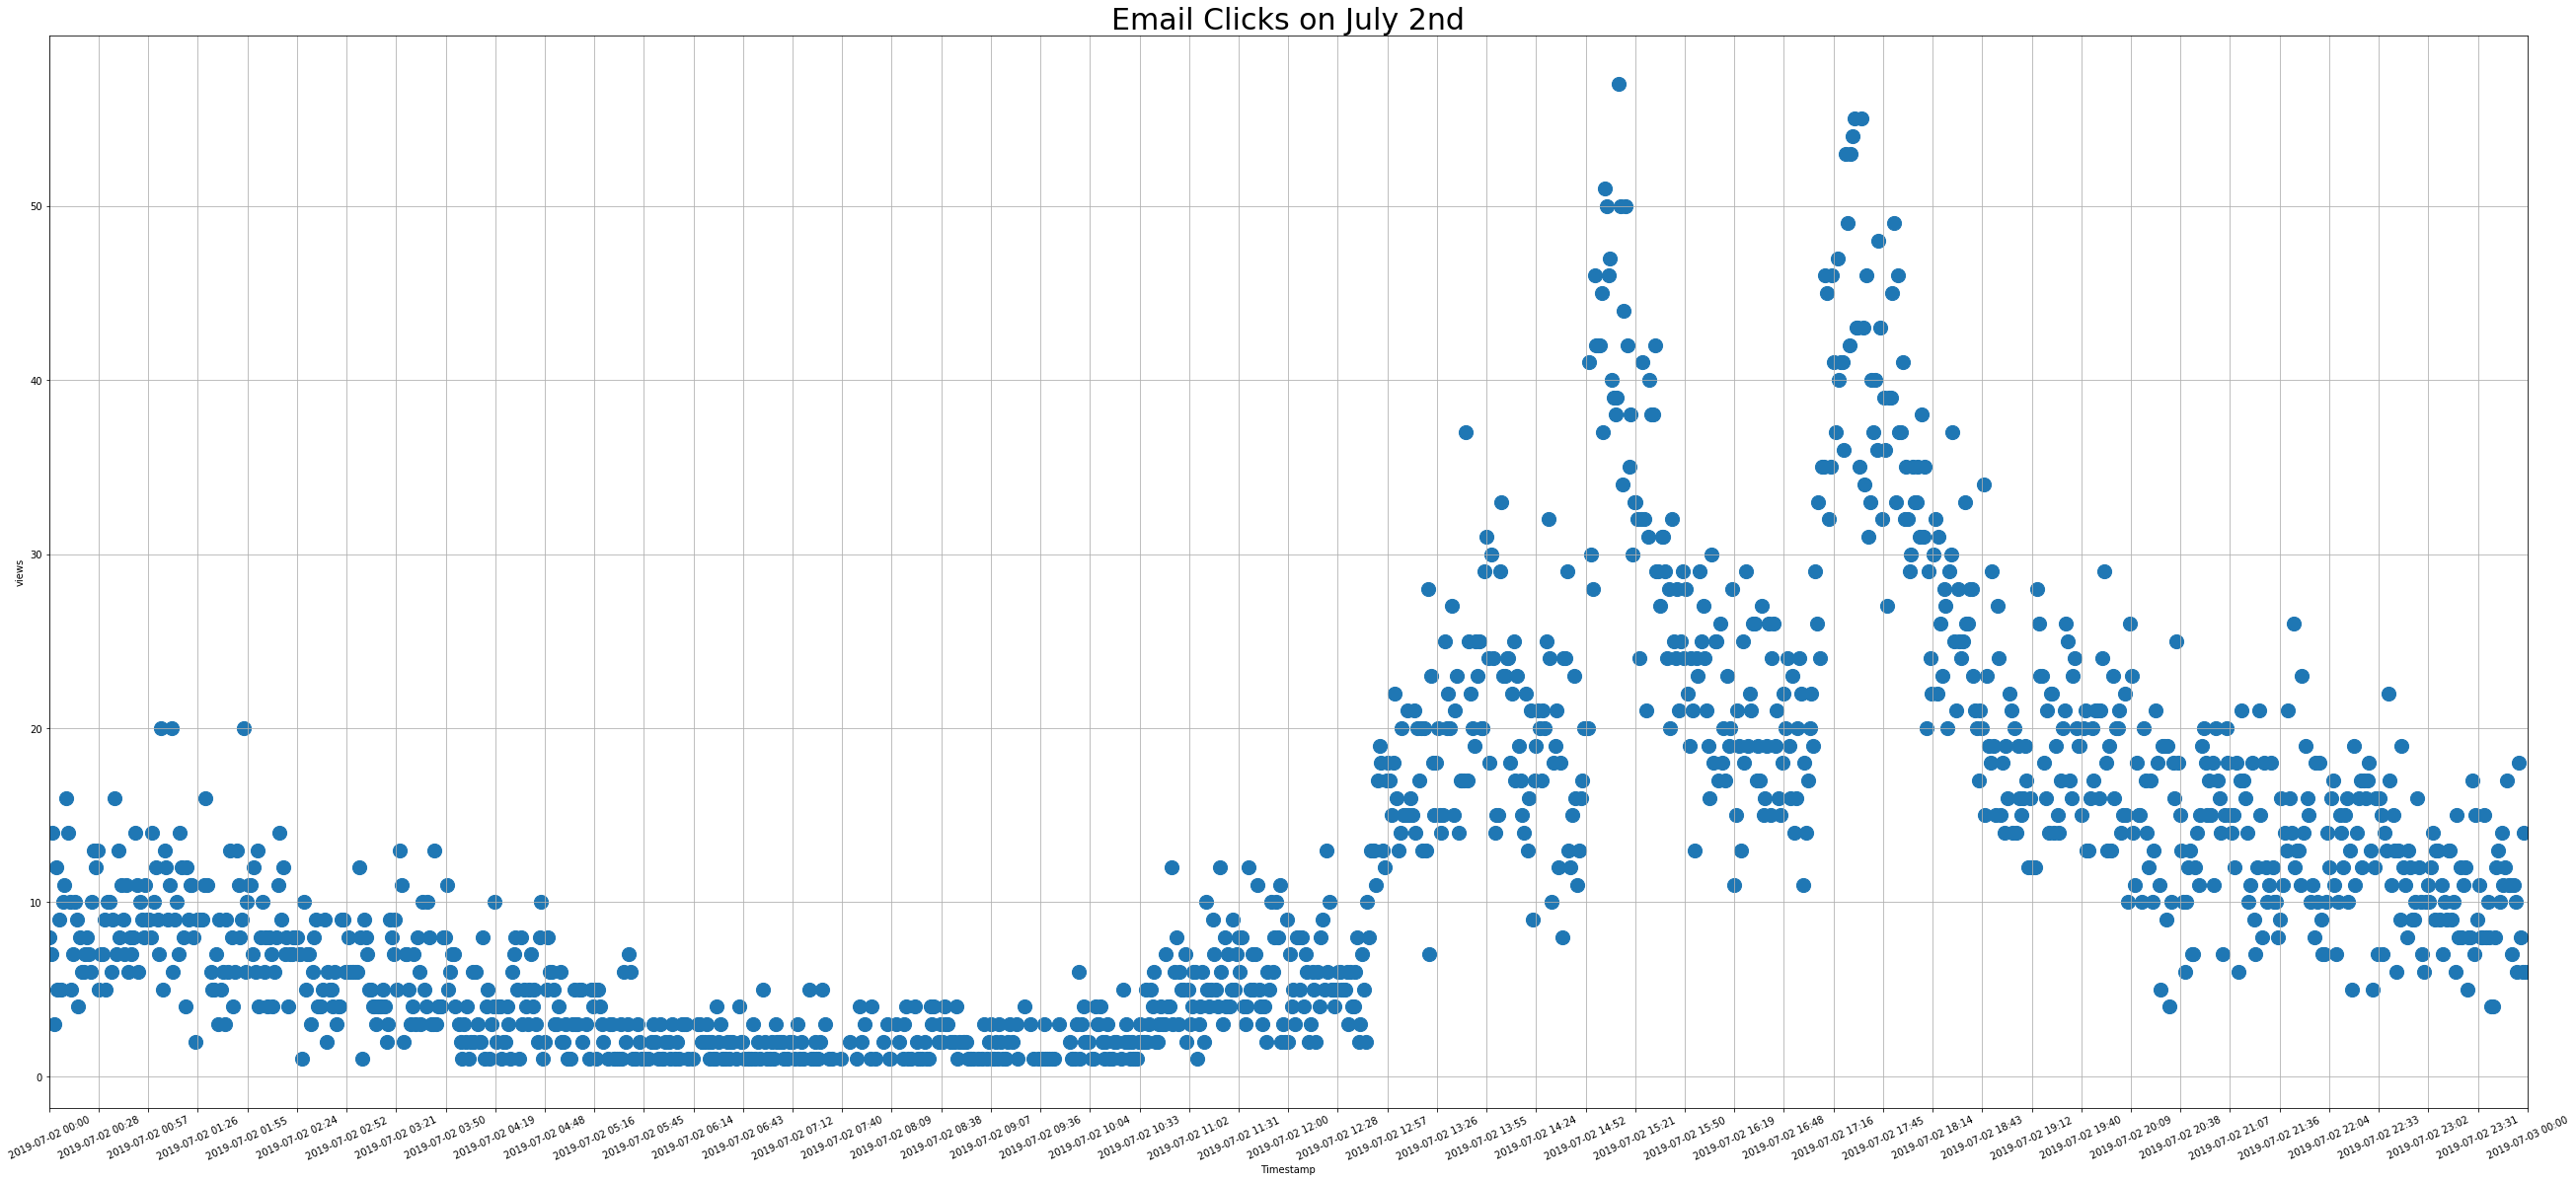

In [30]:
day2 = email_views[email_views.day == 2].groupby('click_time').user_id.count()
plt.figure(figsize=(45,20))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=.02))
ax.grid()
plt.title('Email Clicks on July 2nd',fontsize=30)
plt.scatter(day2.index,day2.values, s=200)
plt.xlim('2019-07-02','2019-07-03' )
plt.show()

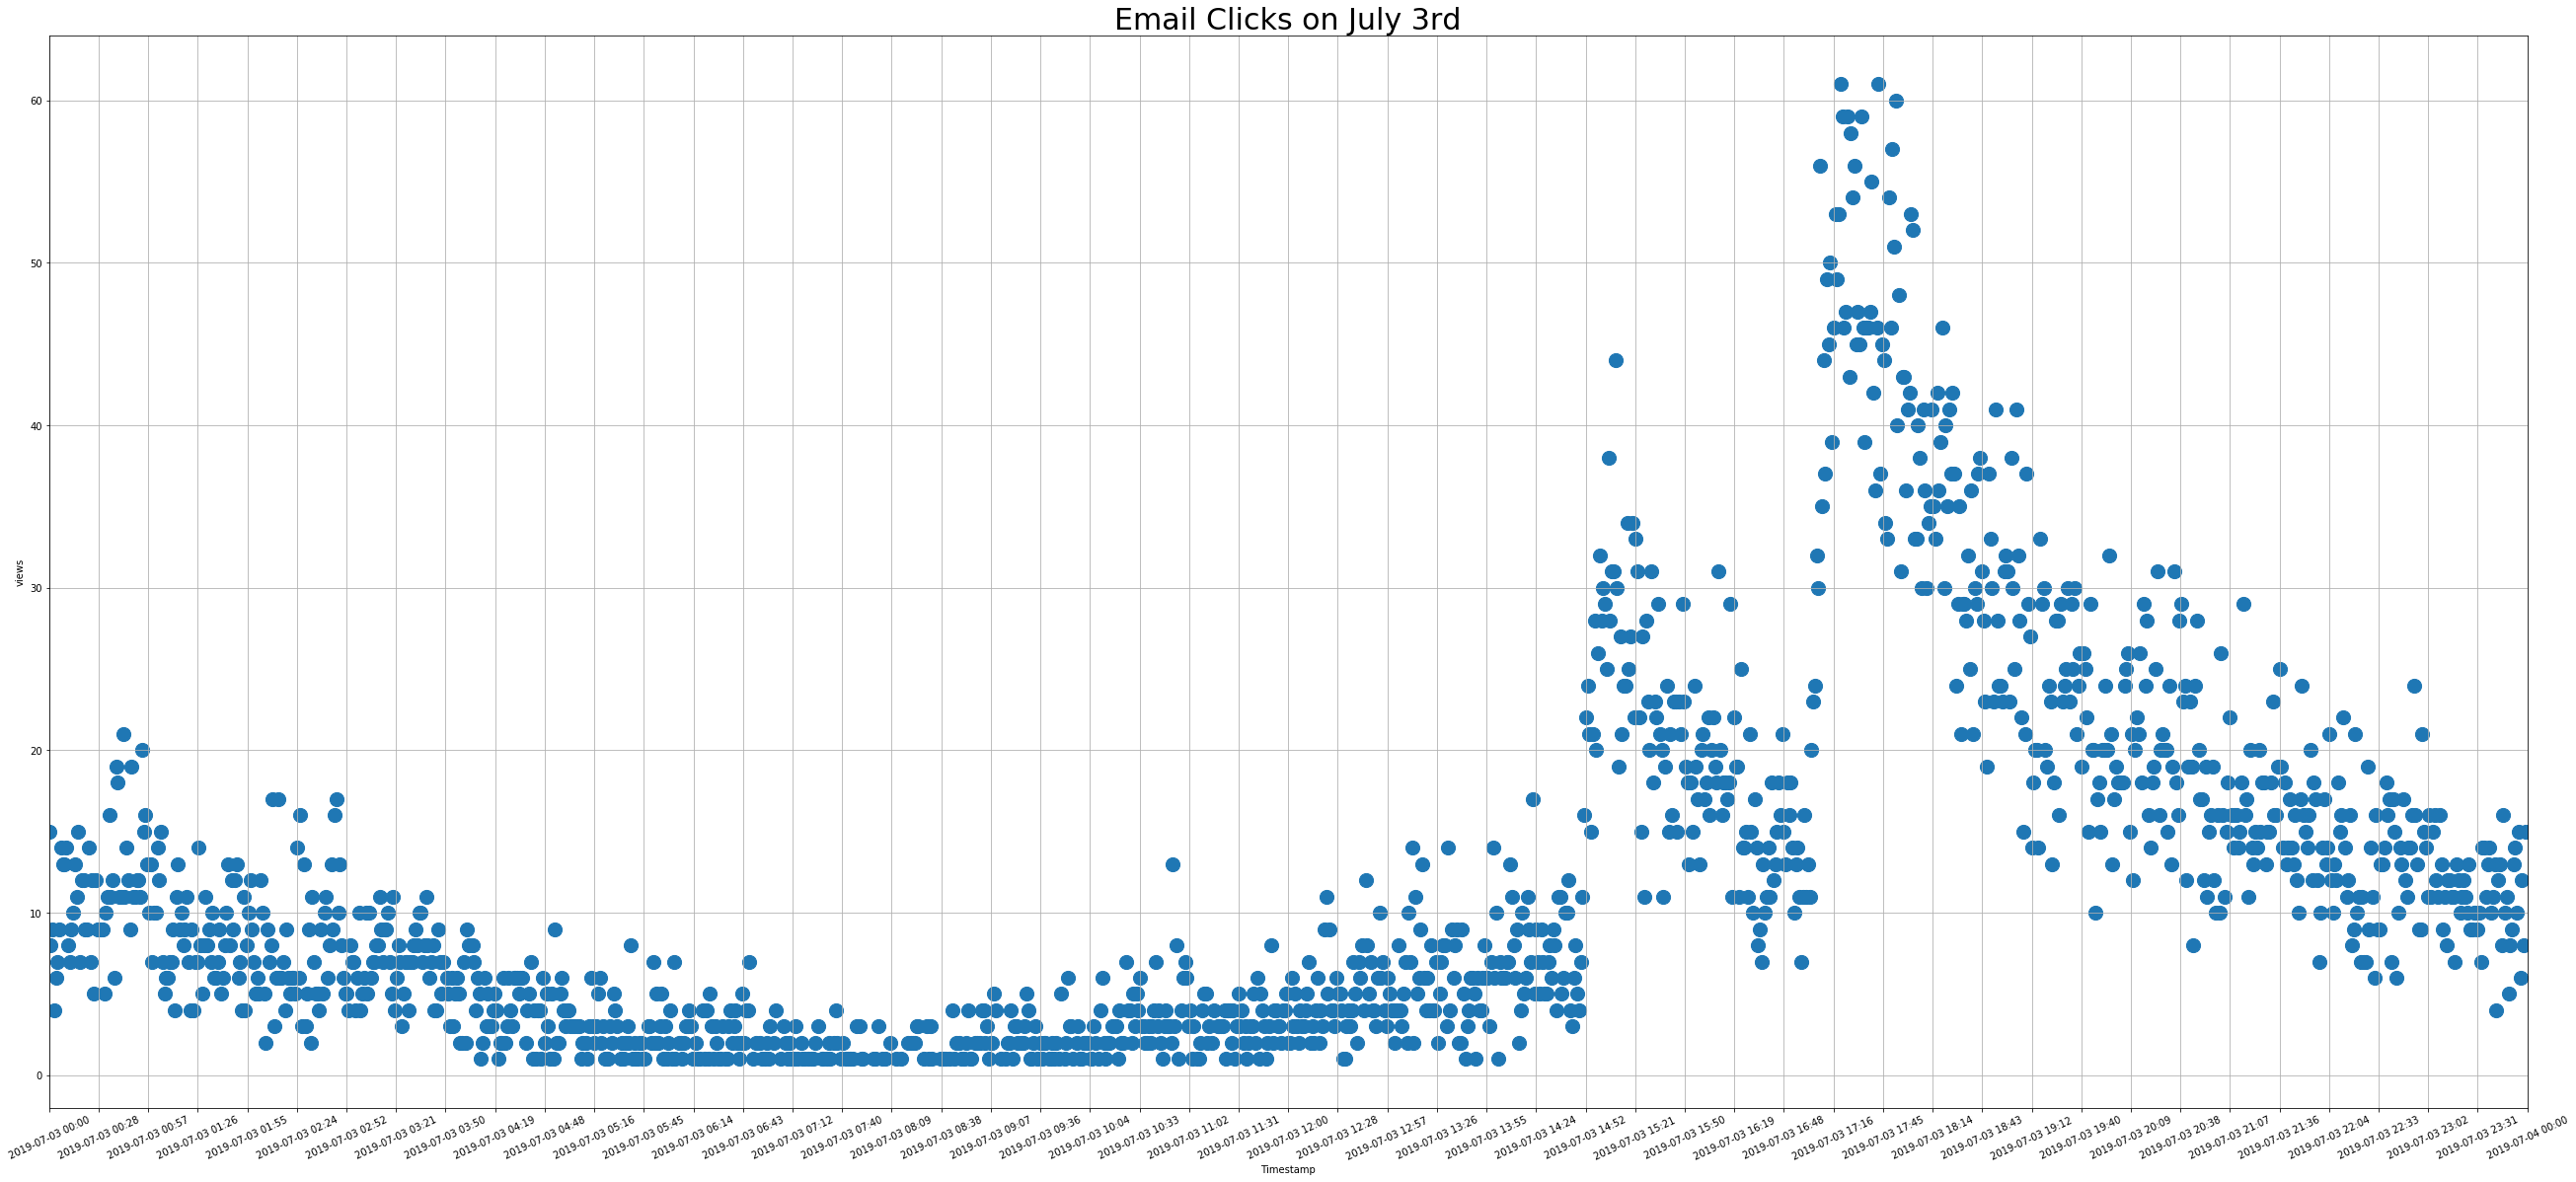

In [31]:
day3 = email_views[email_views.day == 3].groupby('click_time').user_id.count()
plt.figure(figsize=(45,20))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=.02))
ax.grid()
plt.title('Email Clicks on July 3rd',fontsize=30)
plt.scatter(day3.index,day3.values, s =200)
plt.xlim('2019-07-03','2019-07-04' )
plt.show()

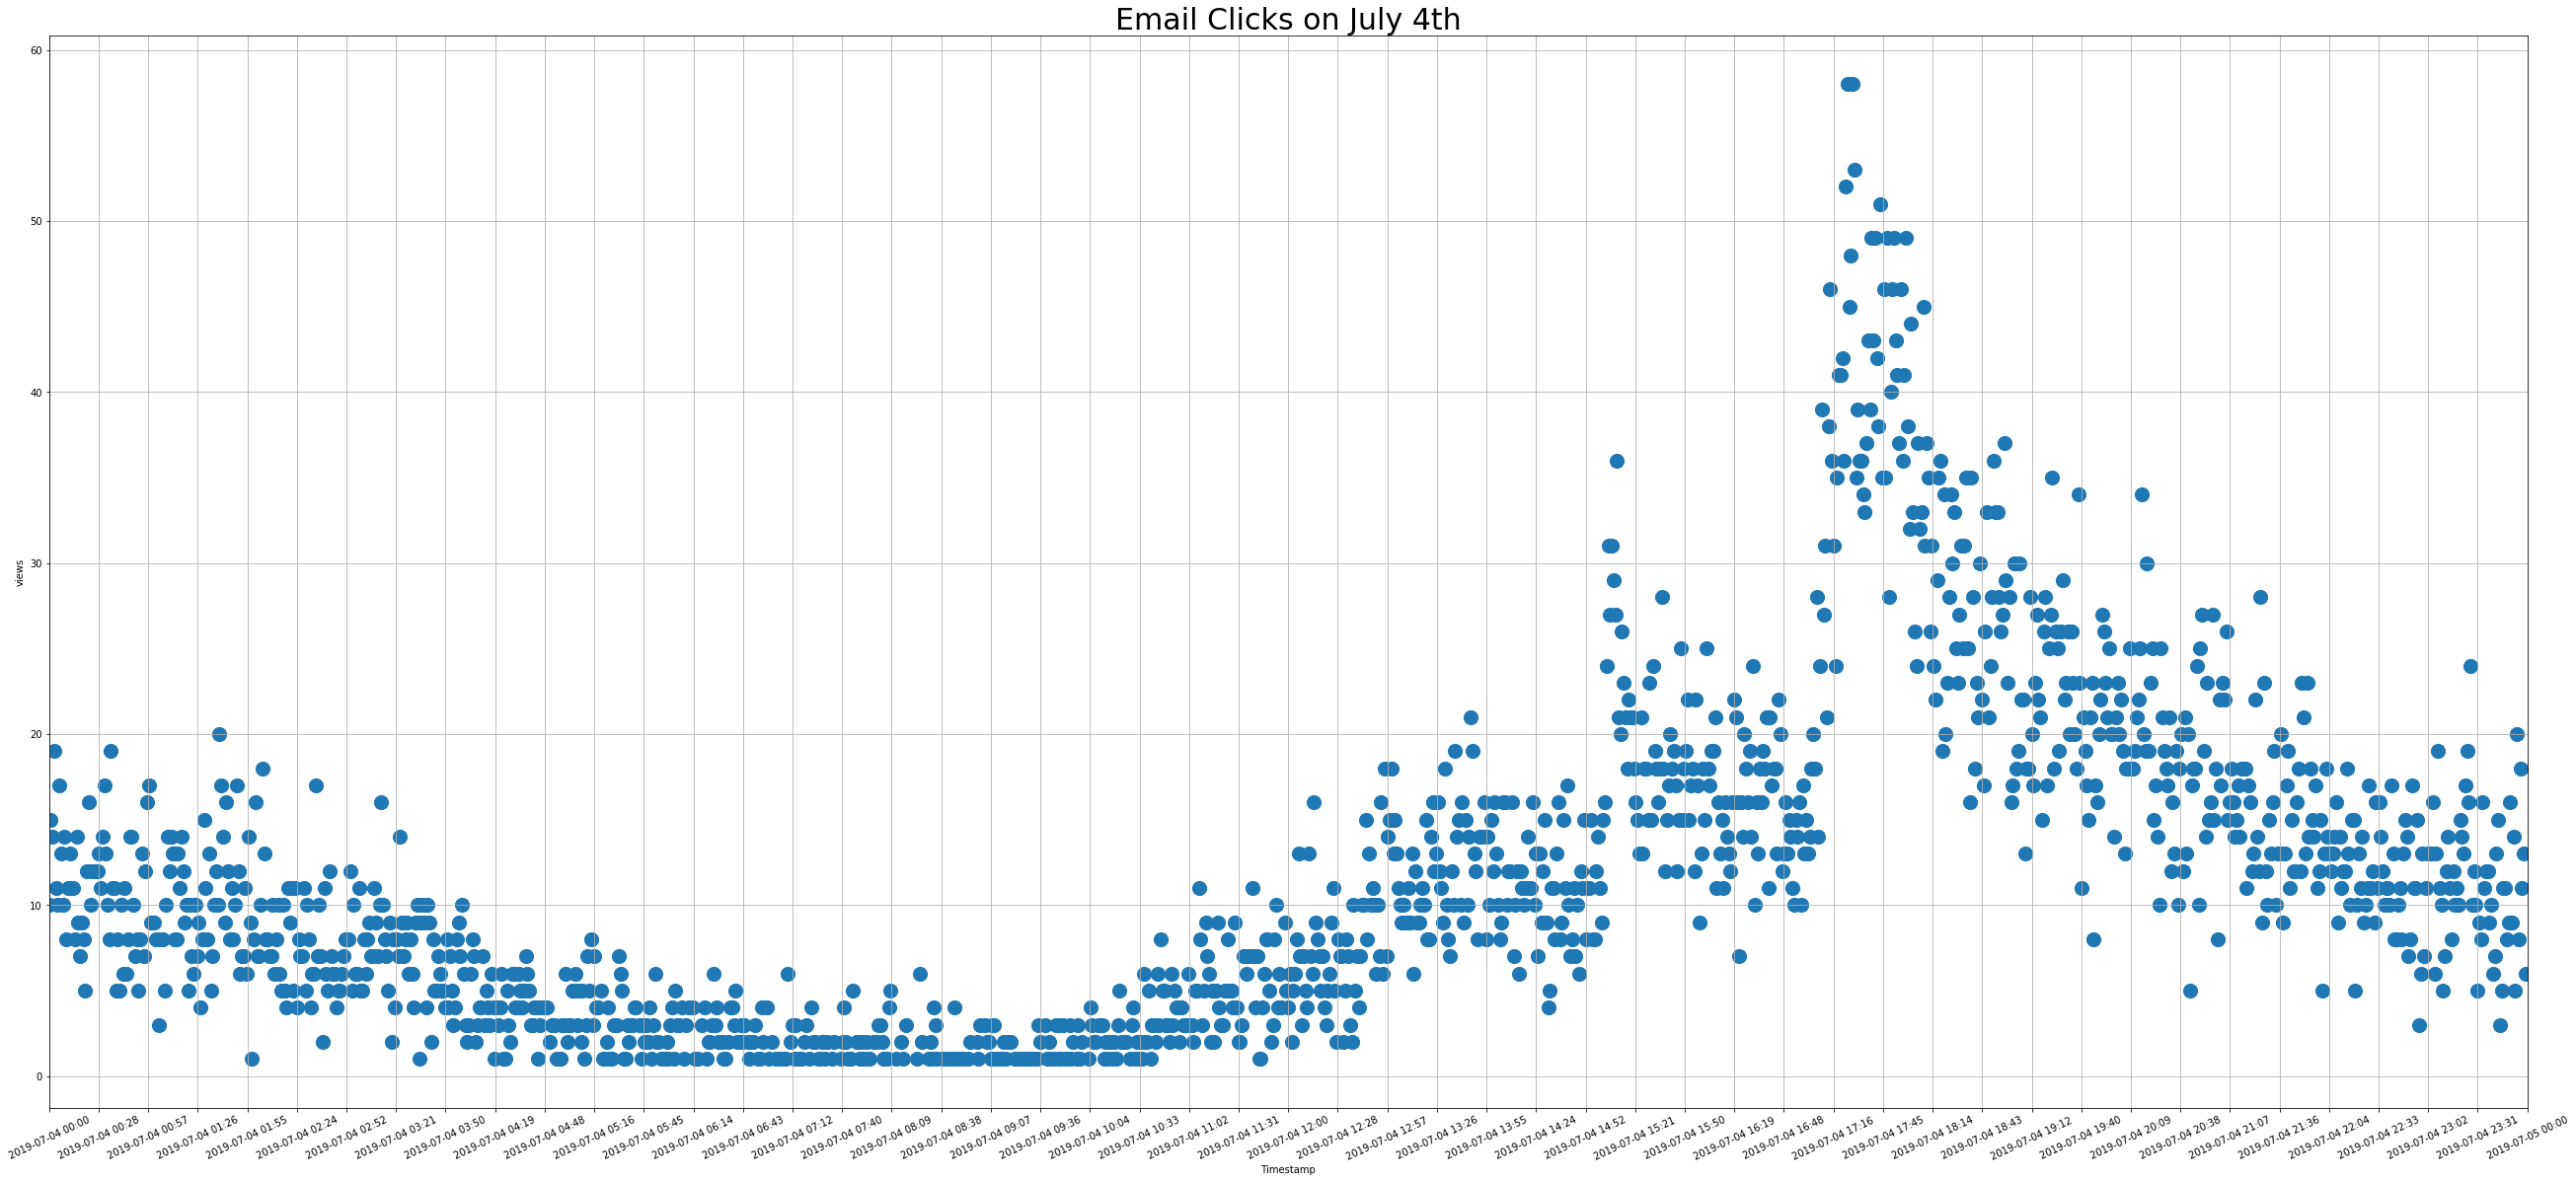

In [32]:
day4 = email_views[email_views.day == 4].groupby('click_time').user_id.count()
plt.figure(figsize=(45,20))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=.02))
ax.grid()
plt.title('Email Clicks on July 4th',fontsize=30)
plt.scatter(day4.index,day4.values, s= 200)
plt.xlim('2019-07-04','2019-07-05' )
plt.show()

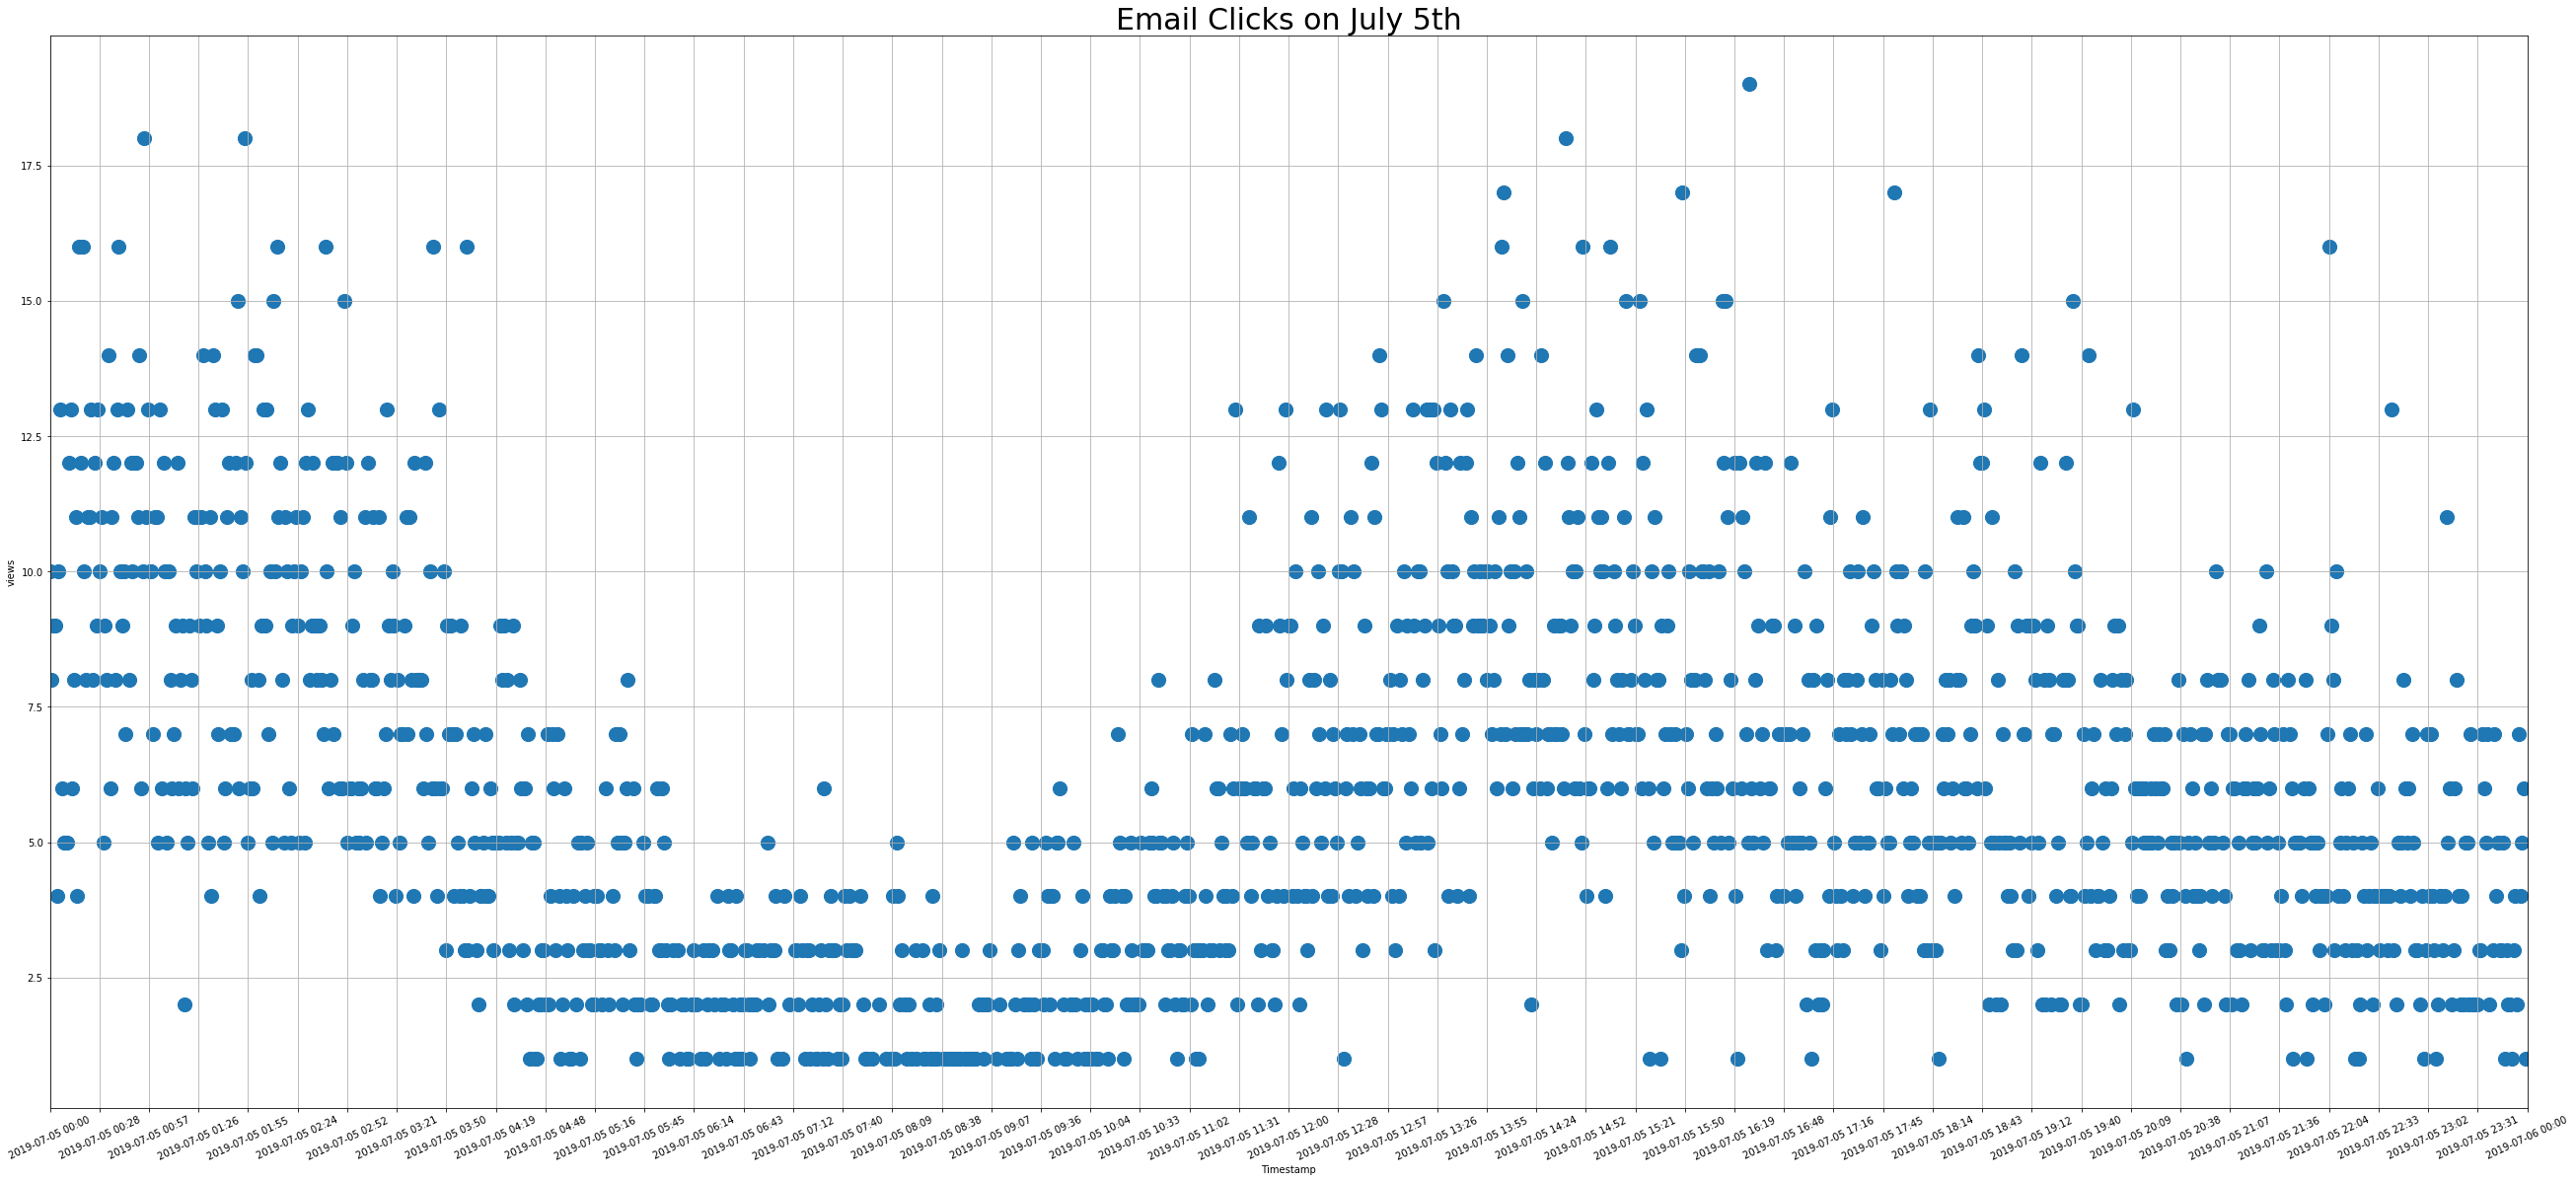

In [33]:
day5 = email_views[email_views.day == 5].groupby('click_time').user_id.count()
plt.figure(figsize=(45,20))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=.02))
ax.grid()
plt.title('Email Clicks on July 5th',fontsize=30)
plt.scatter(day5.index,day5.values, s=200)
plt.xlim('2019-07-05','2019-07-06' )
plt.show()

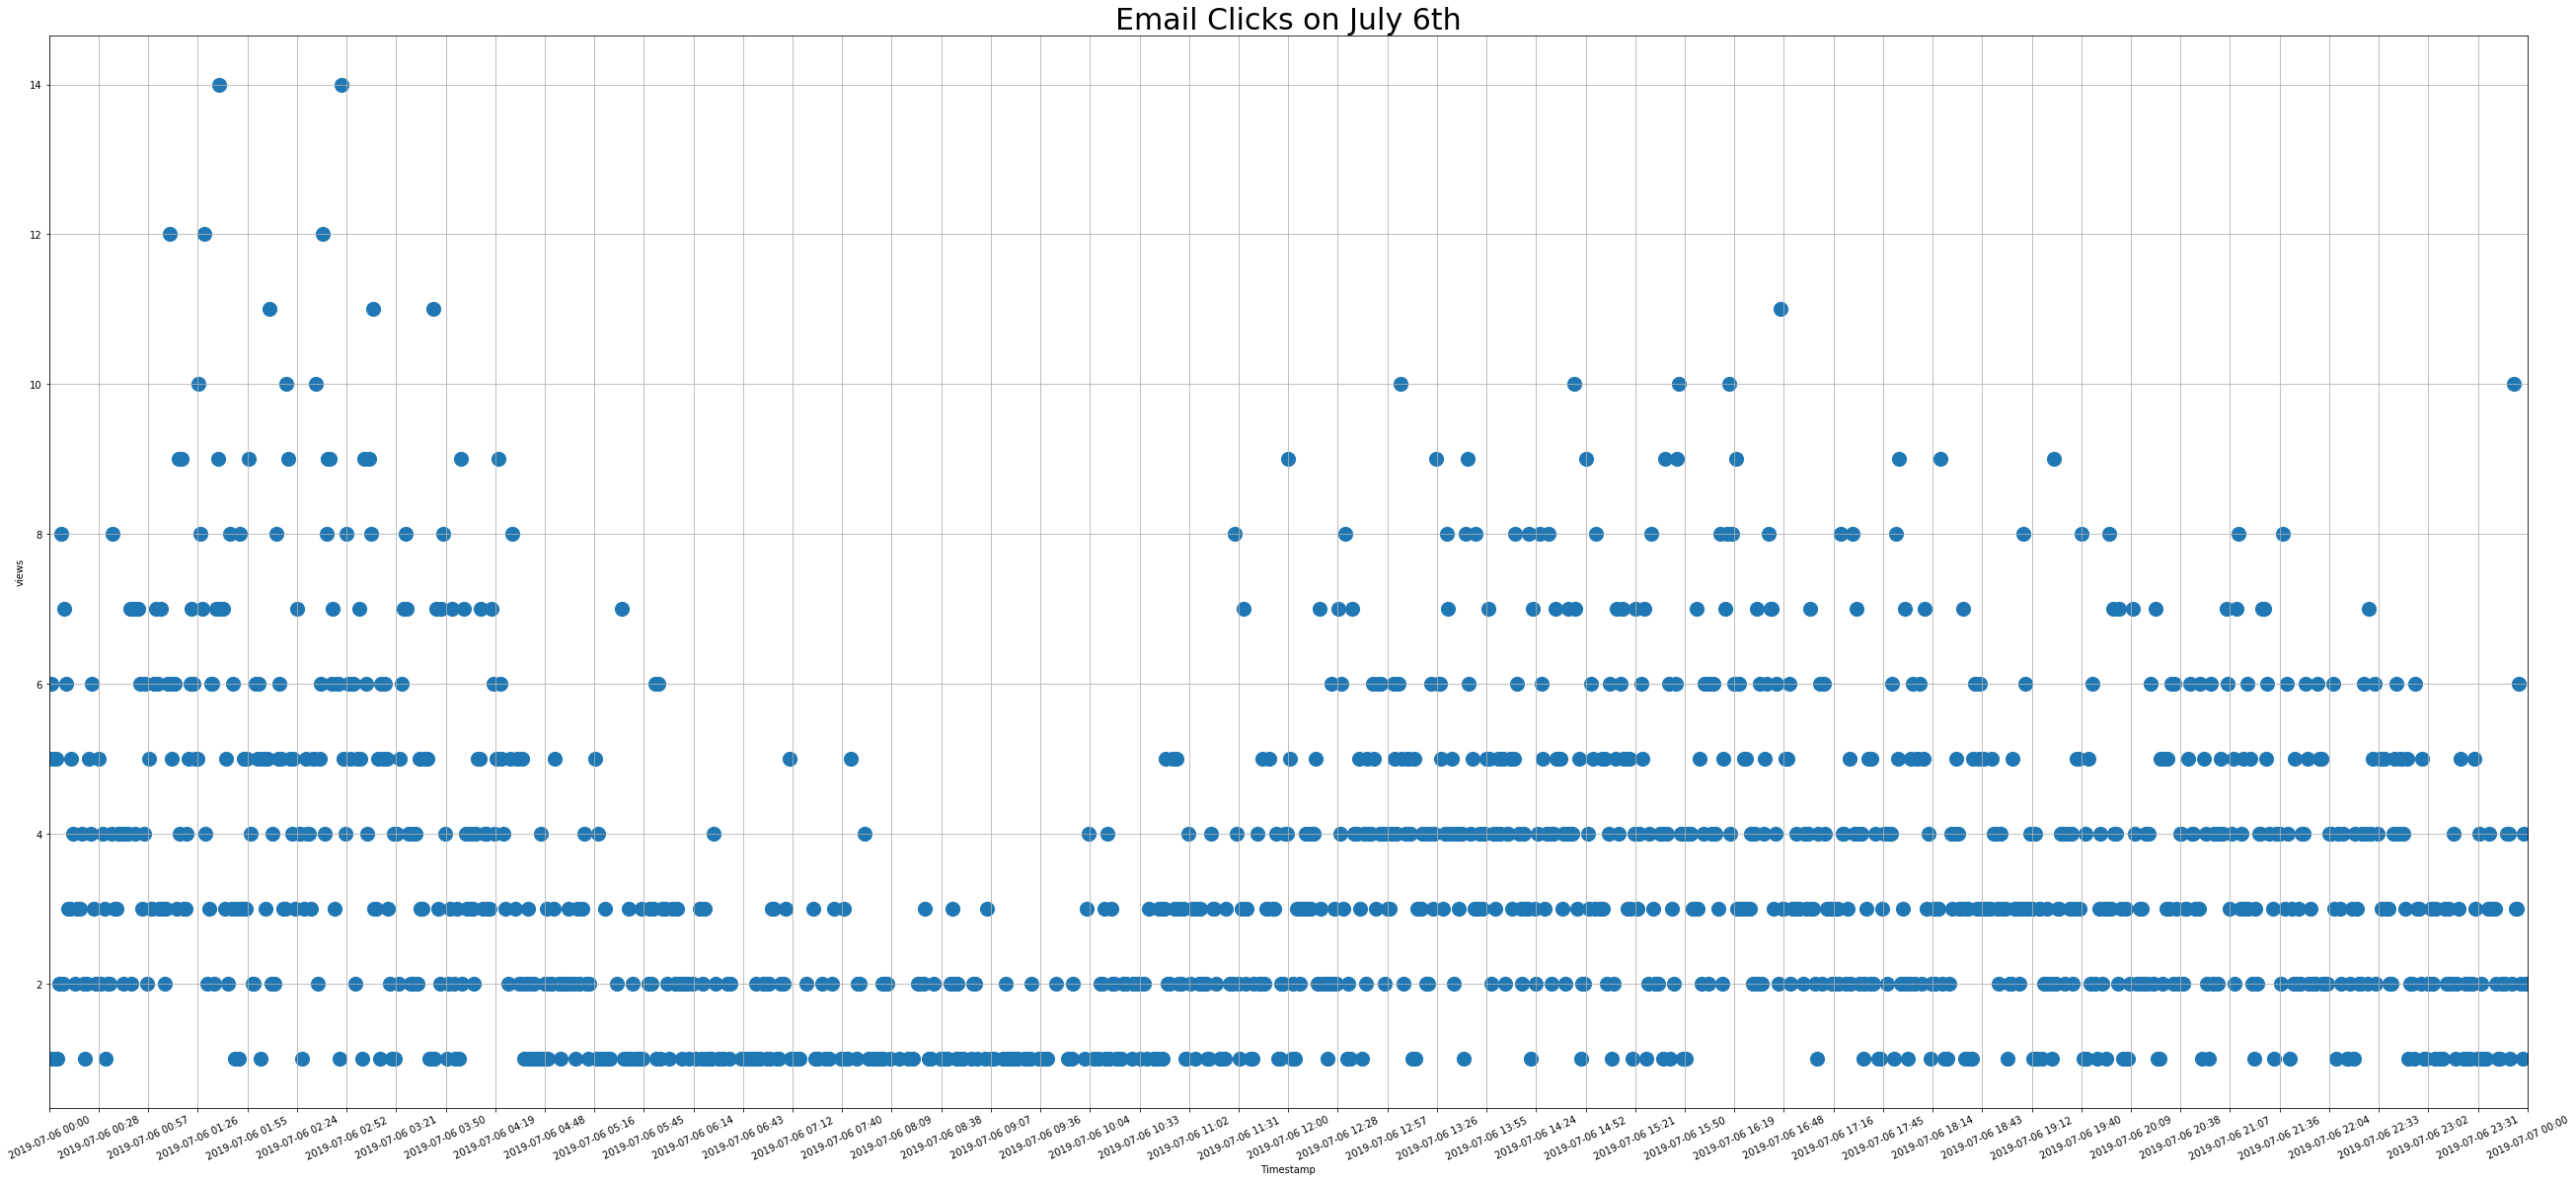

In [34]:
day6 = email_views[email_views.day == 6].groupby('click_time').user_id.count()
plt.figure(figsize=(45,20))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=.02))
ax.grid()
plt.title('Email Clicks on July 6th',fontsize=30)
plt.scatter(day6.index,day6.values, s=200)
plt.xlim('2019-07-06','2019-07-07' )
plt.show()

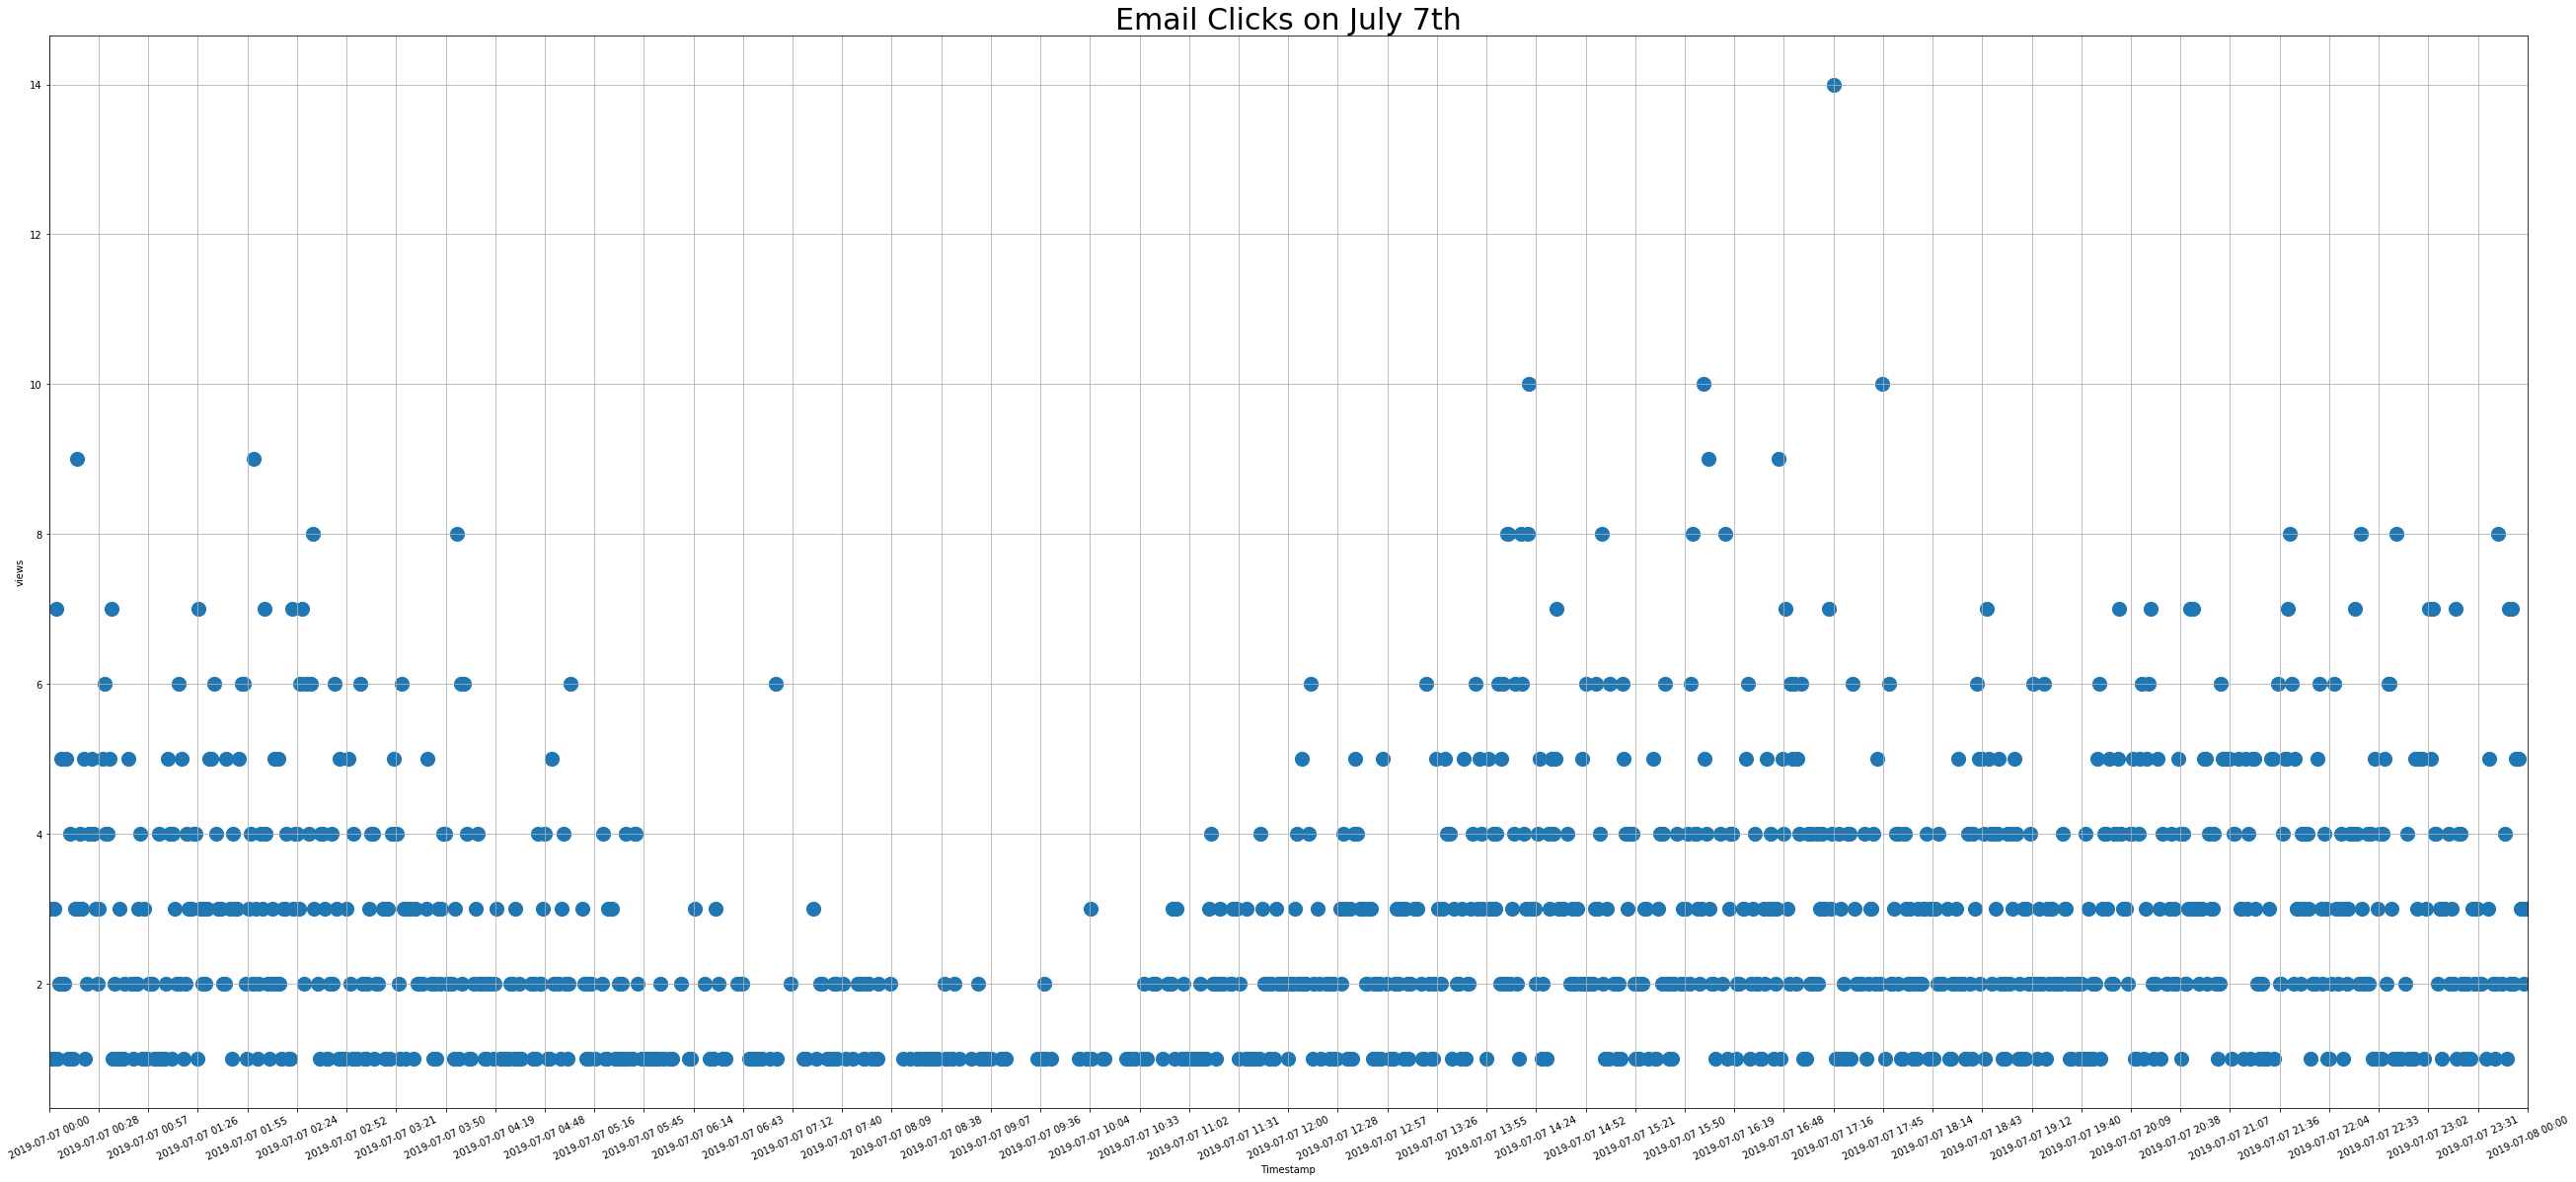

In [35]:
day7 = email_views[email_views.day == 7].groupby('click_time').user_id.count()
plt.figure(figsize=(45,20))
plt.ylabel('views')
plt.xlabel('Timestamp')
plt.xticks(rotation=25)
ax = plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis.set_major_locator(tck.MultipleLocator(base=.02))
ax.grid()
plt.title('Email Clicks on July 7th',fontsize=30)
plt.scatter(day7.index,day7.values, s=200)
plt.xlim('2019-07-07','2019-07-08' )
plt.show()

In [36]:
# check the percentage of customers with different view times
user_views = views.groupby('user_id').click_time.count().reset_index()
user_views.click_time.describe(np.arange(0,1,0.05))

count    41237.000000
mean         2.985959
std          3.873612
min          1.000000
0%           1.000000
5%           1.000000
10%          1.000000
15.0%        1.000000
20%          1.000000
25%          1.000000
30.0%        1.000000
35%          1.000000
40%          1.000000
45%          2.000000
50%          2.000000
55.0%        2.000000
60.0%        2.000000
65%          3.000000
70%          3.000000
75%          3.000000
80%          4.000000
85.0%        5.000000
90%          6.000000
95%          9.000000
max        149.000000
Name: click_time, dtype: float64

In [37]:
# use decile-based discretization to view the distribution
user_views['rank'] = pd.qcut(user_views.click_time,10,duplicates='drop',labels=False)
user_views['rank range'] = pd.qcut(user_views.click_time,10,duplicates='drop')
user_views['rank range'].value_counts()

(0.999, 2.0]    26611
(2.0, 3.0]       4782
(6.0, 149.0]     3826
(4.0, 6.0]       3192
(3.0, 4.0]       2826
Name: rank range, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

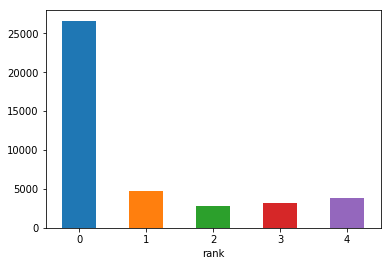

In [38]:
# plot the results above
user_views.groupby('rank')['user_id'].count().plot(kind = 'bar')
plt.xticks(rotation='horizontal')

In [39]:
# partition customers into different groups based on weekly frequency
user_day_views = views.groupby(['day','user_id']).click_time.count().reset_index()
weekly_frequency = user_day_views.groupby('user_id').day.count().reset_index()
weekly_dist = weekly_frequency.groupby('day').user_id.count().reset_index()
weekly_dist.columns = ['day', 'views']
weekly_dist

,day,views
0,1,29195
1,2,8167
2,3,2679
3,4,841
4,5,253
5,6,77
6,7,25


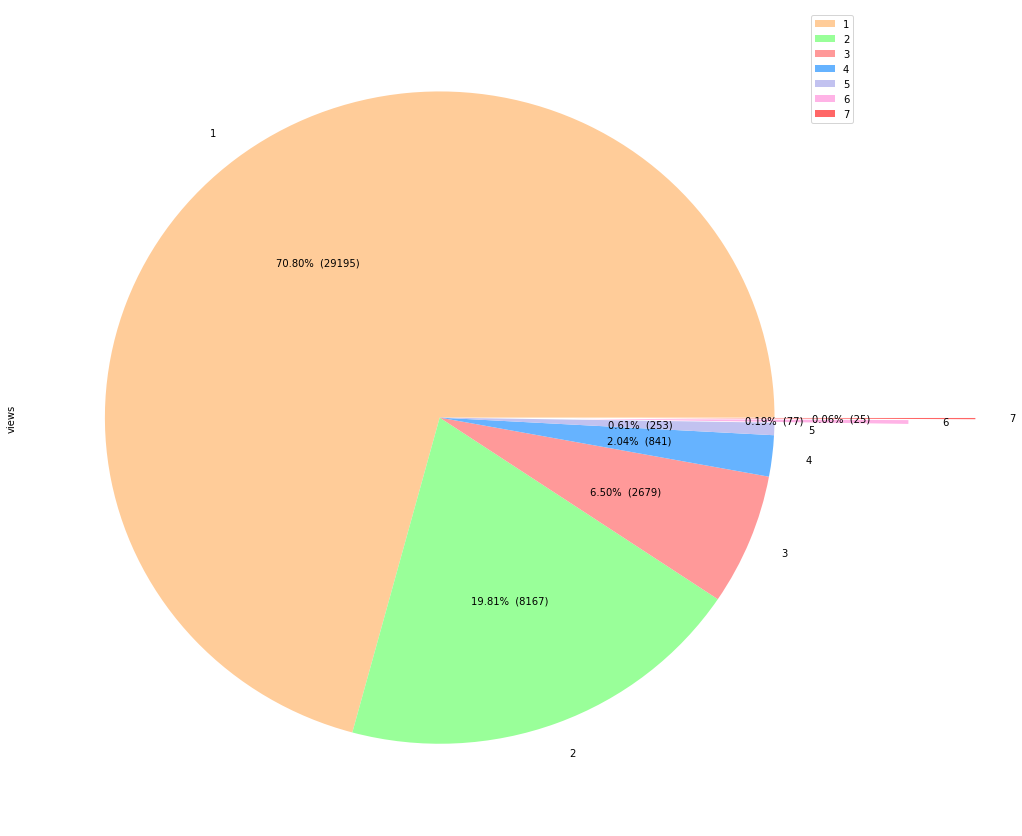

In [40]:
# plot the results above
explode = (0, 0, 0, 0, 0, 0.4, 0.6)
weekly_dist.index = [1,2,3,4,5,6,7]
weekly_dist.plot(kind = 'pie', x = 'day', y = 'views', figsize=(15,15),autopct=make_autopct(weekly_dist.views), explode = explode, colors = ['#ffcc99','#99ff99','#ff9999','#66b3ff', '#c2c2f0','#ffb3e6','#ff6666'])

In [41]:
# re-partitioned the groups into three tiers
tier1_user_id = weekly_frequency[weekly_frequency.day >= 5].user_id.tolist()
tier1_view = views[views.user_id.isin(tier1_user_id)]
tier2 = [3,4]
tier2_user_id = weekly_frequency[weekly_frequency.day.isin(tier2)].user_id.tolist()
tier2_view = views[views.user_id.isin(tier2_user_id)]
tier3 = [1,2]
tier3_user_id = weekly_frequency[weekly_frequency.day.isin(tier3)].user_id.tolist()
tier3_view = views[views.user_id.isin(tier3_user_id)]

In [42]:
# Get hourly views percentage of each tier
click = views[views.campaign == 'email'].groupby('hour').user_id.count()
a = float(sum(click.values))
aa = click.values/a
tier1_click = tier1_view.groupby('hour').user_id.count()
b = float(sum(tier1_click.values))
bb = tier1_click.values/b
tier2_click = tier2_view.groupby('hour').user_id.count()
c = float(sum(tier2_click.values))
cc = tier2_click.values/c
tier3_click = tier3_view.groupby('hour').user_id.count()
d = float(sum(tier3_click.values))
dd = tier3_click.values/d

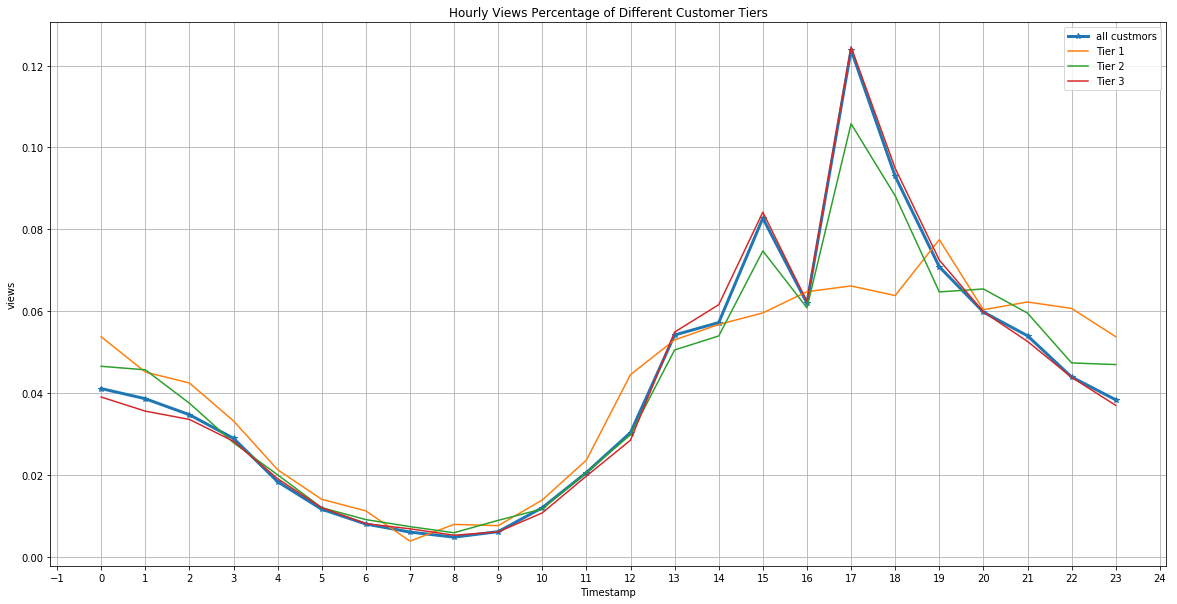

In [43]:
# plot the result in a timeframe
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel('views')
plt.xlabel('Timestamp')
ax.plot(click.index,aa,linewidth = 3, marker = '*', label = 'all custmors')
ax.plot(click.index,bb,label = 'Tier 1')
ax.plot(click.index,cc,label = 'Tier 2')
ax.plot(click.index,dd,label = 'Tier 3')
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1))
plt.title("Hourly Views Percentage of Different Customer Tiers")
ax.grid()
ax.legend()
plt.show()

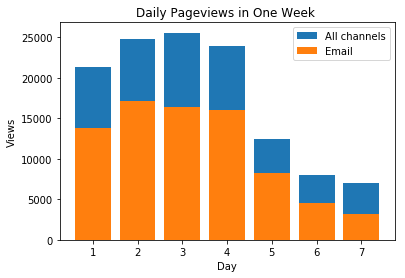

In [44]:
# plot views from email and all channels in each day within a week
day_views = views.groupby('day').user_id.count().reset_index()
email_day_views = views[views.campaign == 'email'].groupby('day').user_id.count().reset_index()
plt.bar(day_views.day,day_views.user_id, label = 'All channels')
plt.bar(email_day_views.day,email_day_views.user_id, label ='Email')
plt.title('Daily Pageviews in One Week ')
plt.ylabel('Views')
plt.xlabel('Day')
plt.xticks(day_views.day,rotation='horizontal')
plt.legend()
plt.show()

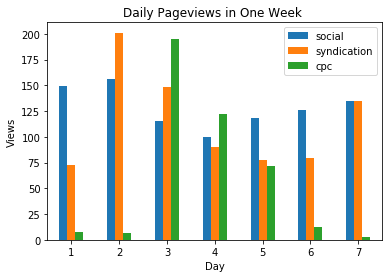

In [45]:
#day views from channels social, syndication, and cpc
cpc_day_views = views[views.campaign == 'cpc'].groupby('day').user_id.count()
syndication_day_views = views[views.campaign == 'syndication'].groupby('day').user_id.count()
social_day_views = views[views.campaign == 'social'].groupby('day').user_id.count()
cp = pd.concat([social_day_views,syndication_day_views,cpc_day_views], axis=1)
cp.columns = ['social', 'syndication','cpc']
cp.plot(kind = 'bar')
plt.title('Daily Pageviews in One Week ')
plt.ylabel('Views')
plt.xlabel('Day')
plt.xticks(rotation='horizontal')
plt.legend()
plt.show()